# KMeans and PCA


# Phase 0: Introduction

In this Notebook, we will develop K-means and PCA algorithm to perform data segmentation. The dataset contains behavioral variables of customers such as Balance, Purchases, etc. We want to make a model to segment the same customers into the clusters.

In [1]:
# essential packages 
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.model_selection import train_test_split
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore") 

# add any other packages that you may need here

In [2]:
!wget -O https://www.dropbox.com/scl/fi/vcejtazdshv8dnhbnfxc7/dataset.csv?rlkey=zauavuzjf5jzmdoqtorkmrkzk&dl=1

# Phase 1: Explore

## Sec 1: Load and Explore the given dataset 

Load the dataset and display the first 10 rows of dataset. 

In [3]:
df = pd.read_csv("/kaggle/input/market-segmentation-in-insurance-unsupervised/Customer Data.csv")
df_cp = df.copy()
df.head(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
6,C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12
7,C10008,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12
8,C10009,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12
9,C10010,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12


Print the column names and number of data samples. 

In [4]:
print('Column names :\n')
for item in df.columns:
    print(item)

Column names :

CUST_ID
BALANCE
BALANCE_FREQUENCY
PURCHASES
ONEOFF_PURCHASES
INSTALLMENTS_PURCHASES
CASH_ADVANCE
PURCHASES_FREQUENCY
ONEOFF_PURCHASES_FREQUENCY
PURCHASES_INSTALLMENTS_FREQUENCY
CASH_ADVANCE_FREQUENCY
CASH_ADVANCE_TRX
PURCHASES_TRX
CREDIT_LIMIT
PAYMENTS
MINIMUM_PAYMENTS
PRC_FULL_PAYMENT
TENURE


In [5]:
print('Number of samples : ',len(df))

Number of samples :  8950


Identify the columns that contain nan values.

In [6]:
print('Columns that contain nan values :\n')

nan_columns = df.columns[df.isna().any()].tolist()
print(nan_columns)

Columns that contain nan values :

['CREDIT_LIMIT', 'MINIMUM_PAYMENTS']


Fill the nan values with the median of each column. 

In [7]:
column_types = df.dtypes

numeric_columns = column_types[column_types != 'object'].index

df_filled = df.copy()
df[numeric_columns] = df_filled[numeric_columns].fillna(df[numeric_columns].median())


Find the max, min, and average of each column with numerical data.

In [8]:
max_values = df[numeric_columns].max()
min_values = df[numeric_columns].min()
average_values = df[numeric_columns].mean()

print('Minimum of each column :')
print(min_values)

print('-----------------------------------------')

print('Maximum of each column :')
print(max_values)

print('-----------------------------------------')

print('Average of each column :')
print(average_values)

Minimum of each column :
BALANCE                              0.000000
BALANCE_FREQUENCY                    0.000000
PURCHASES                            0.000000
ONEOFF_PURCHASES                     0.000000
INSTALLMENTS_PURCHASES               0.000000
CASH_ADVANCE                         0.000000
PURCHASES_FREQUENCY                  0.000000
ONEOFF_PURCHASES_FREQUENCY           0.000000
PURCHASES_INSTALLMENTS_FREQUENCY     0.000000
CASH_ADVANCE_FREQUENCY               0.000000
CASH_ADVANCE_TRX                     0.000000
PURCHASES_TRX                        0.000000
CREDIT_LIMIT                        50.000000
PAYMENTS                             0.000000
MINIMUM_PAYMENTS                     0.019163
PRC_FULL_PAYMENT                     0.000000
TENURE                               6.000000
dtype: float64
-----------------------------------------
Maximum of each column :
BALANCE                             19043.13856
BALANCE_FREQUENCY                       1.00000
PURCHASES      

Plot the Histogram of each column with numerical data. Also, show the median and average value of each column in plot. 

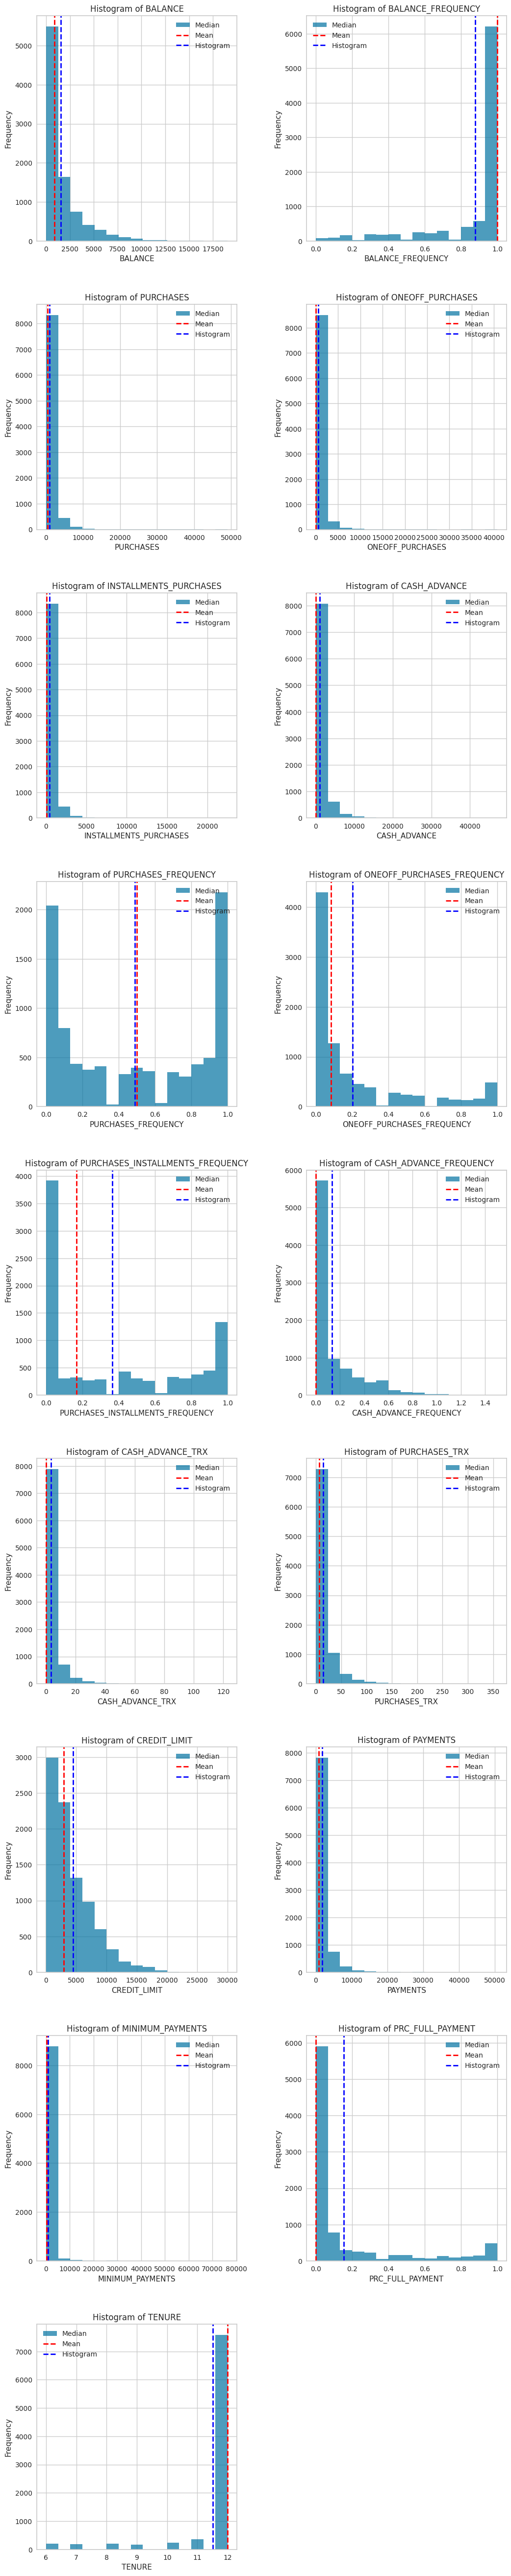

In [9]:
num_rows = len(numeric_columns) // 2 + len(numeric_columns) % 2

fig, axs = plt.subplots(nrows=num_rows, ncols=2, figsize=(12, 6 * num_rows))
fig.tight_layout(pad=6.0)

for i, column in enumerate(numeric_columns):
    row = i // 2
    col = i % 2

    df[column].plot(kind='hist', bins=15, alpha=0.7, ax=axs[row, col])

    axs[row, col].axvline(df[column].median(), color='red', linestyle='dashed', linewidth=2)
    axs[row, col].axvline(df[column].mean(), color='blue', linestyle='dashed', linewidth=2)

    axs[row, col].set_title(f'Histogram of {column}')
    axs[row, col].set_xlabel(column)
    axs[row, col].set_ylabel('Frequency')
    axs[row, col].legend(['Median', 'Mean', 'Histogram'])

if len(numeric_columns) % 2 != 0:
    fig.delaxes(axs[-1, -1])

plt.show()

Display the box plot for each numerical column. 

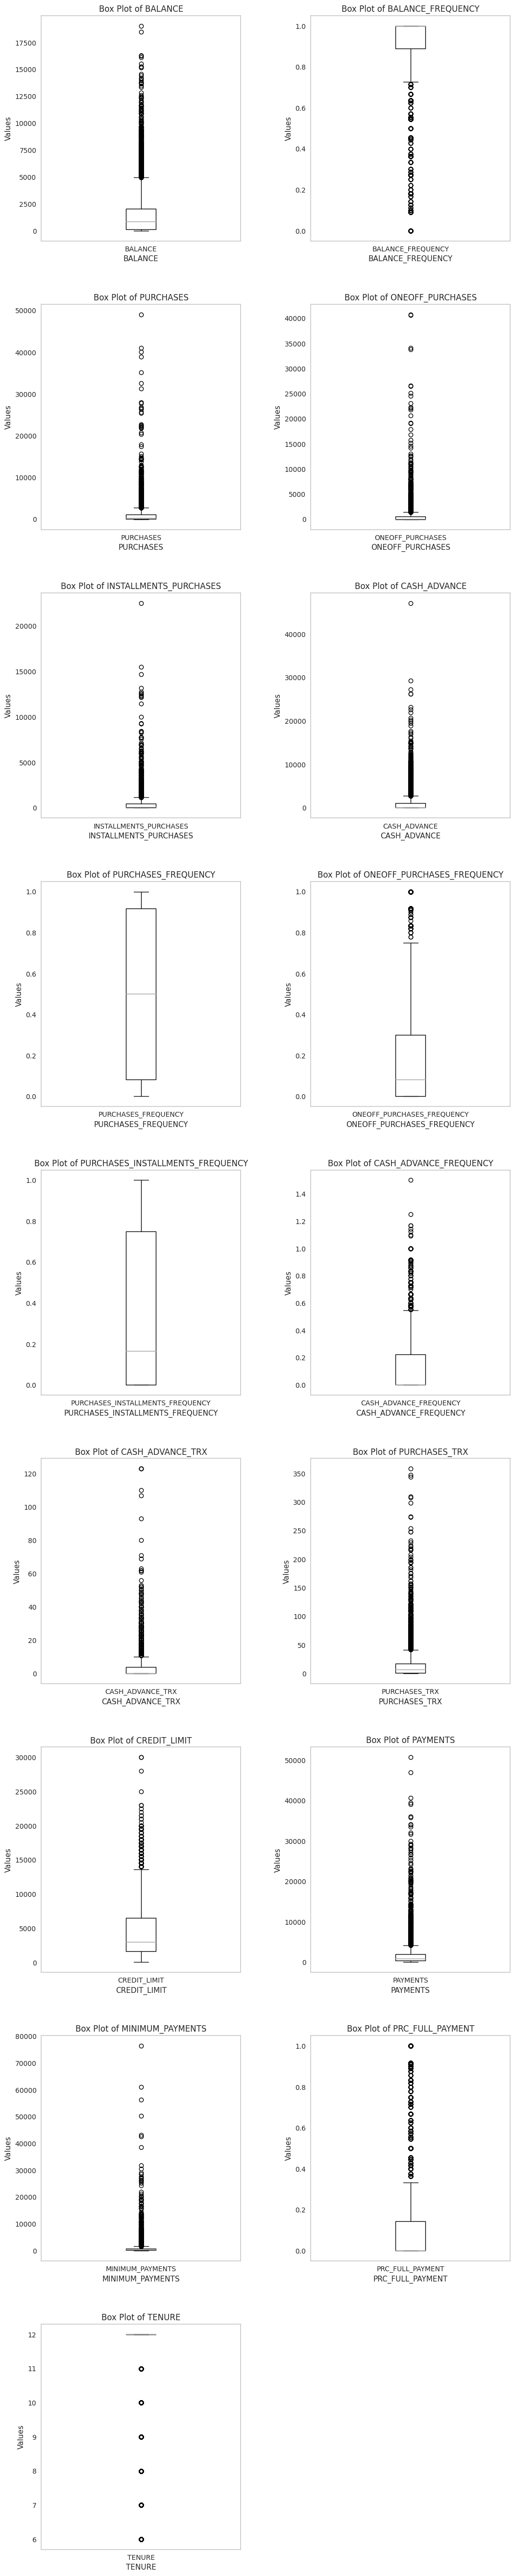

In [10]:
fig, axs = plt.subplots(nrows=num_rows, ncols=2, figsize=(12, 6 * num_rows))
fig.tight_layout(pad=6.0)

for i, column in enumerate(numeric_columns):
    row = i // 2
    col = i % 2

    df.boxplot(column=column, ax=axs[row, col], grid=False)

    axs[row, col].set_title(f'Box Plot of {column}')
    axs[row, col].set_xlabel(column)
    axs[row, col].set_ylabel('Values')

if len(numeric_columns) % 2 != 0:
    fig.delaxes(axs[-1, -1])

plt.show()

Show the correlation between columns by plotting the heatmap of correlation coefficients.

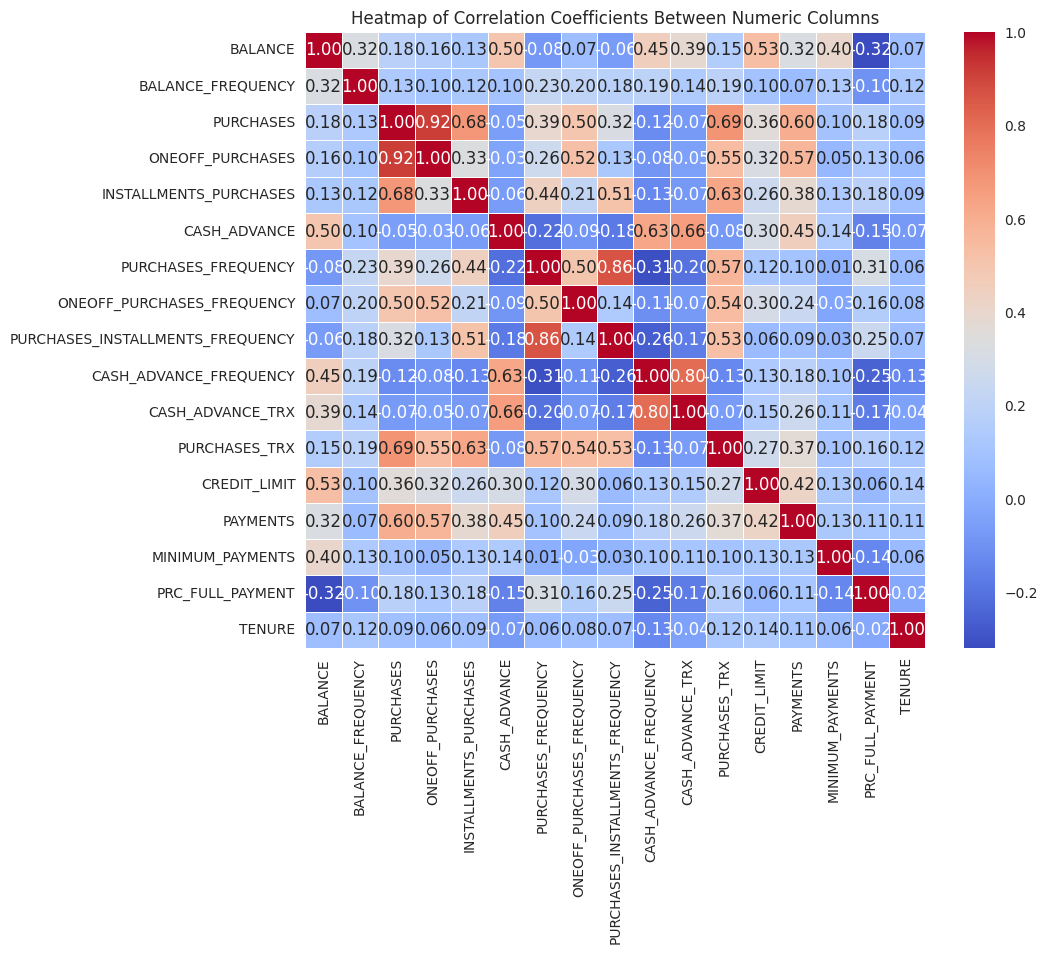

In [11]:
correlation_matrix = df[numeric_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5, fmt=".2f")
plt.title('Heatmap of Correlation Coefficients Between Numeric Columns')
plt.show()

# Phase 2: Preprocessing

## Sec 1: Preprocess the data 

drop the 'CUST_ID' column. 

In [12]:
df = df.drop(columns=['CUST_ID'])

df.head(10)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
6,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12
7,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12
8,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12
9,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12


Check for duplicated rows. If there is any duplicated row, remove them. 

In [13]:
duplicates = df.duplicated()
num_duplicates = duplicates.sum()

if num_duplicates > 0:
    df = df.drop_duplicates()
    result = f"Duplicates found and removed: {num_duplicates} rows."
else:
    df = df.copy()
    result = "No duplicates found."

print(result)
df.head(10) 

No duplicates found.


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
6,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12
7,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12
8,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12
9,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12


Normalize the values of each column.

In [14]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

df.head(10)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.002148,0.818182,0.001945,0.000000,0.004240,0.000000,0.166667,0.000000,0.083333,0.000000,0.00000,0.005587,0.031720,0.003979,0.001826,0.000000,1.0
1,0.168169,0.909091,0.000000,0.000000,0.000000,0.136685,0.000000,0.000000,0.000000,0.166667,0.03252,0.000000,0.232053,0.080893,0.014034,0.222222,1.0
2,0.131026,1.000000,0.015766,0.018968,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.033520,0.248748,0.012264,0.008210,0.000000,1.0
3,0.087521,0.636364,0.030567,0.036775,0.000000,0.004366,0.083333,0.083333,0.000000,0.055555,0.00813,0.002793,0.248748,0.000000,0.004088,0.000000,1.0
4,0.042940,1.000000,0.000326,0.000393,0.000000,0.000000,0.083333,0.083333,0.000000,0.000000,0.00000,0.002793,0.038397,0.013374,0.003204,0.000000,1.0
5,0.095038,1.000000,0.027188,0.000000,0.059257,0.000000,0.666667,0.000000,0.583333,0.000000,0.00000,0.022346,0.058431,0.027603,0.031506,0.000000,1.0
6,0.032939,1.000000,0.144598,0.157076,0.030595,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.178771,0.449082,0.125279,0.002592,1.000000,1.0
7,0.095764,1.000000,0.008895,0.000000,0.019387,0.000000,1.000000,0.000000,1.000000,0.000000,0.00000,0.033520,0.075125,0.013388,0.006963,0.000000,1.0
8,0.053296,1.000000,0.017567,0.016228,0.008889,0.000000,0.333333,0.083333,0.250000,0.000000,0.00000,0.013966,0.232053,0.013570,0.004083,0.000000,1.0
9,0.007994,0.545455,0.026134,0.031442,0.000000,0.000000,0.166667,0.166667,0.000000,0.000000,0.00000,0.008380,0.365609,0.022964,0.001312,0.000000,1.0


# Phase 3: Modeling

## Sec 1: PCA and K-means with sklearn

Use the `PCA` class from the `sklearn` library to reduce the dimensionality of the DataFrame. 

In [15]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
df_imputed = imputer.fit_transform(df[numeric_columns])

pca = PCA(n_components=2)  
sklearn_df_pca = pca.fit_transform(df_imputed)
sklearn_df_pca = pd.DataFrame(sklearn_df_pca, columns=['PC1', 'PC2'])

sklearn_df_pca = pd.DataFrame(scaler.fit_transform(sklearn_df_pca), columns=sklearn_df_pca.columns)

sklearn_df_pca.head()

,PC1,PC2
0,0.139581,0.351257
1,0.078164,0.395176
2,0.521800,0.922767
3,0.087859,0.402888
4,0.104507,0.435773


**Elbow Method Visualization** helps to determine the optimal number of clusters by visualizing the within-cluster sum of squares (WCSS) against the number of clusters.

Use the `plot_elbow_method function` to plot the number of clusters versus WCSS for both the main DataFrame and the one reduced using `PCA`. Then Discuss the choice of the number of components for PCA and clusters for K-means.

In [16]:
def plot_elbow_method(X, max_clusters=10):
    wcss = []
    for i in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
        kmeans.fit(X)
        wcss.append(kmeans.inertia_)
    
    plt.plot(range(1, max_clusters + 1), wcss)
    plt.title('Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    plt.show()


Elbow Method for Main DataFrame:


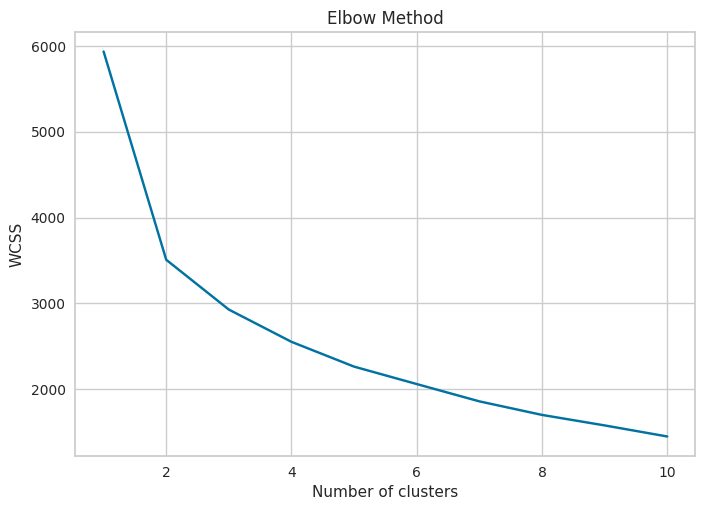

Elbow Method for PCA-Reduced DataFrame:


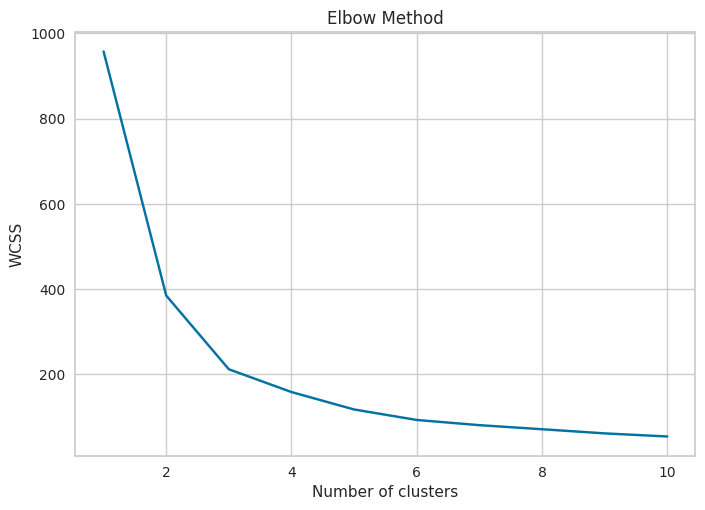

In [17]:
print("Elbow Method for Main DataFrame:")
plot_elbow_method(df_imputed)

print("Elbow Method for PCA-Reduced DataFrame:")
plot_elbow_method(sklearn_df_pca)

Use the `KMeans` class from the `sklearn.cluster` module to create clusters from the DataFrame that has been dimensionally reduced using `PCA`. 

In [18]:
num_clusters = 3

kmeans_pca = KMeans(n_clusters=num_clusters, init='k-means++', random_state=42)

kmeans_pca.fit(sklearn_df_pca)

cluster_labels = kmeans_pca.labels_
print(len(cluster_labels))
print(cluster_labels)

8950
[0 0 1 ... 2 0 0]


In [19]:
df_sklearn_clusters = sklearn_df_pca.copy()
df_sklearn_clusters['Cluster'] = cluster_labels

df_sklearn_clusters.head(10)

,PC1,PC2,Cluster
0,0.139581,0.351257,0
1,0.078164,0.395176,0
2,0.521800,0.922767,1
3,0.087859,0.402888,0
4,0.104507,0.435773,0
5,0.471723,0.291236,2
6,0.939253,0.647097,1
7,0.711305,0.208191,2
8,0.268872,0.403864,0
9,0.125557,0.434296,0


Complete the definition of the following class to implement PCA, which is capable of reducing the dimensionality.

In [20]:
class CustomPCA:
    """
    Custom implementation of PCA.
    Attributes:
    -----------
    n_components : int
        Number of principal components.
    components : ndarray
        Principal components.
    """
    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None

    def fit(self, X):
        """
        Fit the model with X.
        Parameters:
        -----------
        X : ndarray, shape (n_samples, n_features)
            Training data.
        """
        X_standardized = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

        covariance_matrix = np.cov(X_standardized.T)

        eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

        eigenvector_index = np.argsort(eigenvalues)[::-1]
        sorted_eigenvectors = eigenvectors[:, eigenvector_index]

        self.components = sorted_eigenvectors[:, :self.n_components]

    def transform(self, X):
        """
        Apply dimensionality reduction to X.
        Parameters:
        -----------
        X : ndarray, shape (n_samples, n_features)
            Data to transform.
        Returns:
        --------
        X_transformed : ndarray, shape (n_samples, n_components)
            Transformed data.
        """
        X_standardized = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

        X_transformed = np.dot(X_standardized, self.components)

        return X_transformed


Complete defining the class below to implement `KMeans`, an algorithm designed for clustering.

In [21]:
class CustomKMeans:
    """
    Custom implementation of K-means clustering.
    Attributes:
    -----------
    n_clusters : int
        Number of clusters.
    centroids : ndarray
        Coordinates of cluster centers.
    """
    def __init__(self, n_clusters):
        self.n_clusters = n_clusters
        self.centroids = None

    def fit_predict(self, X):
        """
        Compute k-means clustering.
        Parameters:
        -----------
        X : ndarray, shape (n_samples, n_features)
            Training instances to cluster.
        Returns:
        --------
        labels : ndarray, shape (n_samples,)
            Index of the cluster each sample belongs to.
        """
        indices = np.random.permutation(X.shape[0])[:self.n_clusters]
        self.centroids = X[indices]

        for _ in range(300):  
            distances = np.sqrt(((X - self.centroids[:, np.newaxis])**2).sum(axis=2))
            labels = np.argmin(distances, axis=0)

            new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(self.n_clusters)])

            if np.all(self.centroids == new_centroids):
                break
            self.centroids = new_centroids

        return labels


## Sec 2: Fitting implemented Kmeans

Use your implemented `CustomPCA` to reduce the dimensionality of the DataFrame.

In [22]:

custom_pca = CustomPCA(n_components=2)

custom_pca.fit(df_imputed)

my_df_pca = custom_pca.transform(df_imputed)
my_df_pca = pd.DataFrame(my_df_pca, columns=['PC1', 'PC2'])

my_df_pca = pd.DataFrame(scaler.fit_transform(my_df_pca), columns=my_df_pca.columns)

my_df_pca.head()

,PC1,PC2
0,0.033886,0.057315
1,0.050856,0.184993
2,0.115810,0.081866
3,0.058448,0.095707
4,0.036468,0.071164


Apply the `CustomKMeans` implementation you created to perform clustering on the DataFrame.

In [23]:
custom_kmeans = CustomKMeans(n_clusters=num_clusters)
labels = custom_kmeans.fit_predict(my_df_pca.to_numpy())
print(len(labels))
print(labels)

8950
[0 2 0 ... 0 0 0]


In [24]:
df_my_clusters = my_df_pca.copy()
df_my_clusters['Cluster'] = labels

df_my_clusters.head(10)

,PC1,PC2,Cluster
0,0.033886,0.057315,0
1,0.050856,0.184993,2
2,0.115810,0.081866,0
3,0.058448,0.095707,0
4,0.036468,0.071164,0
5,0.093687,0.067863,0
6,0.281965,0.070423,1
7,0.094401,0.049618,0
8,0.072222,0.079160,0
9,0.068465,0.082467,0


# Phase 4: Analyzing

## Sec 1: Visualizing and Comparing 

Visualize and compare the clustering results from the sklearn library with those from your custom clustering implementation. 

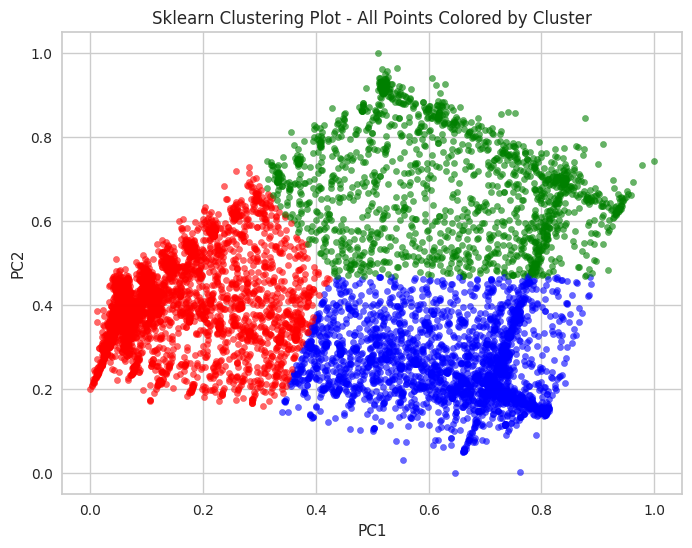

In [25]:
plt.figure(figsize=(8, 6))

color_mapping = {0: 'red', 1: 'green', 2: 'blue'}

for index, row in df_sklearn_clusters.iterrows():
    plt.scatter(row['PC1'], row['PC2'], color=color_mapping[row['Cluster']], alpha=0.6,s=20)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Sklearn Clustering Plot - All Points Colored by Cluster')
plt.legend()
plt.show()

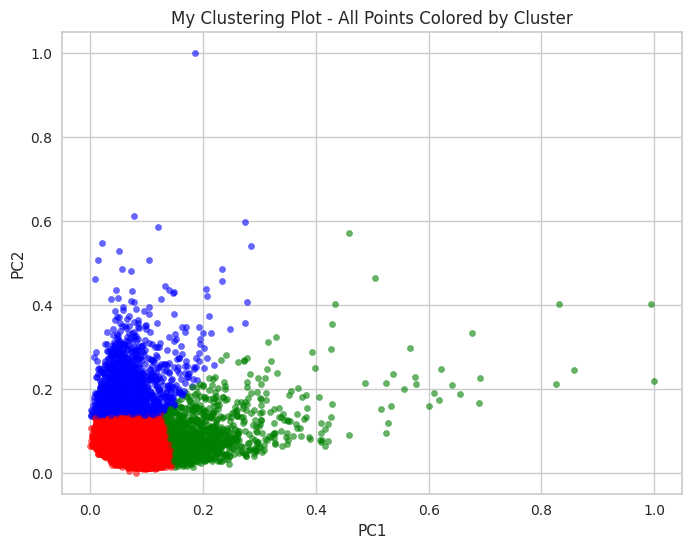

In [26]:
plt.figure(figsize=(8, 6))

for index, row in df_my_clusters.iterrows():
    plt.scatter(row['PC1'], row['PC2'], color=color_mapping[row['Cluster']], alpha=0.6,s=20)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('My Clustering Plot - All Points Colored by Cluster')
plt.legend()
plt.show()

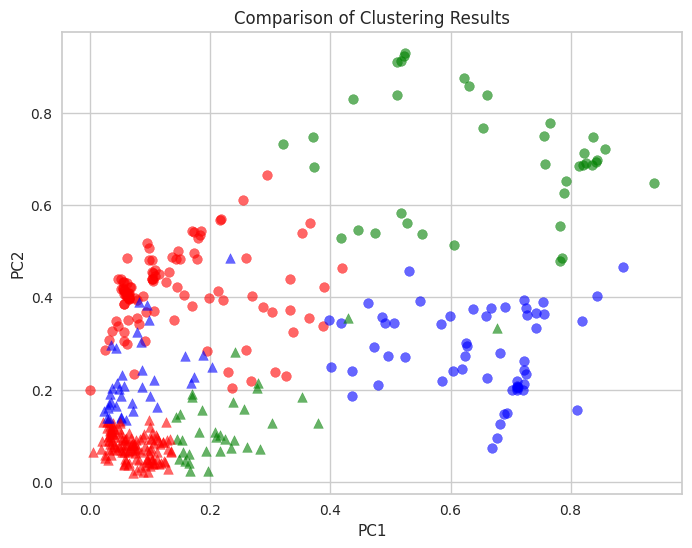

In [27]:
plt.figure(figsize=(8, 6))

color_mapping = {0: 'red', 1: 'green', 2: 'blue'} 

for index, row in df_sklearn_clusters[:200].iterrows():
    plt.scatter(row['PC1'], row['PC2'], color=color_mapping[row['Cluster']], alpha=0.6)

for index, row in df_my_clusters[:200].iterrows():
    plt.scatter(row['PC1'], row['PC2'], color=color_mapping[row['Cluster']], marker='^', alpha=0.6)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Comparison of Clustering Results')
plt.legend()
plt.show()

## Sec 2: Silhouette Analysis

**Silhouette Analysis** involves calculating and plotting the silhouette coefficients, which measure how similar each point is to its own cluster compared to other clusters. The closer these coefficients are to +1, the better the clustering.

Calculate the silhouette scores for each sample in the dataset using `silhouette_samples` and the average silhouette score using `silhouette_score`. Then, visualize these scores in a plot for each cluster for both results from the sklearn library and those from your custom clustering implementation.

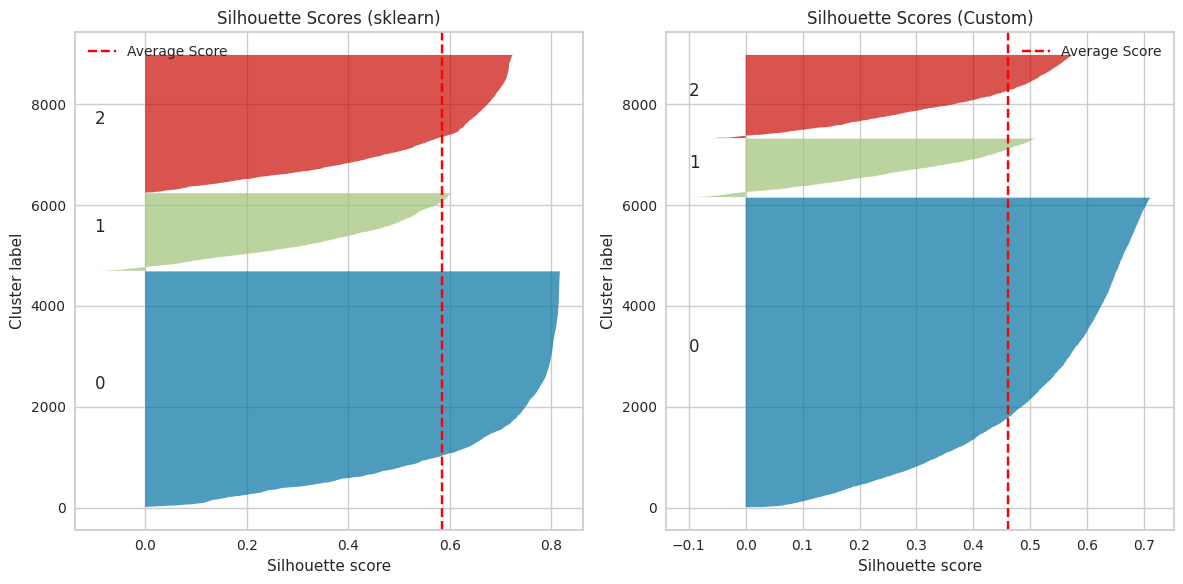

In [28]:
silhouette_scores_sklearn = silhouette_samples(sklearn_df_pca, cluster_labels)

silhouette_scores_custom = silhouette_samples(my_df_pca, labels)

avg_silhouette_score_sklearn = silhouette_score(sklearn_df_pca, cluster_labels)
avg_silhouette_score_custom = silhouette_score(my_df_pca, labels)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
y_lower = 10
for i in range(len(np.unique(cluster_labels))):
    cluster_i_silhouette_scores = silhouette_scores_sklearn[cluster_labels == i]
    cluster_i_silhouette_scores.sort()
    cluster_size = cluster_i_silhouette_scores.shape[0]
    y_upper = y_lower + cluster_size
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_i_silhouette_scores, alpha=0.7)
    plt.text(-0.1, y_lower + 0.5 * cluster_size, str(i))
    y_lower = y_upper + 10

plt.xlabel('Silhouette score')
plt.ylabel('Cluster label')
plt.title('Silhouette Scores (sklearn)')
plt.axvline(x=avg_silhouette_score_sklearn, color='red', linestyle='--', label='Average Score')
plt.legend()


plt.subplot(1, 2, 2)
y_lower = 10
for i in range(len(np.unique(labels))):
    cluster_i_silhouette_scores = silhouette_scores_custom[labels == i]
    cluster_i_silhouette_scores.sort()
    cluster_size = cluster_i_silhouette_scores.shape[0]
    y_upper = y_lower + cluster_size
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_i_silhouette_scores, alpha=0.7)
    plt.text(-0.1, y_lower + 0.5 * cluster_size, str(i))
    y_lower = y_upper + 10

plt.xlabel('Silhouette score')
plt.ylabel('Cluster label')
plt.title('Silhouette Scores (Custom)')
plt.axvline(x=avg_silhouette_score_custom, color='red', linestyle='--', label='Average Score')
plt.legend()

plt.tight_layout()
plt.show()